# Equações Diferenciais Ordinárias

Uma equação diferencial é uma equação cuja incógnita é uma função que aparece na equação sob a forma das respectivas derivadas. Sendo ordinárias as equações que envolvem derivadas de uma só variável independente.

Como exemplo, temos a função para **taxa de crescimento exponencial**:

$$ \frac{dy}{dx} = \lambda y(x) $$

*Outros exemplos*:

$$ y(x) y'(x) = 5 $$

$$ \frac{sen(y'(x))}{y(x)^2+1} = y''(x)$$

$$ y(x) x + y'(x) = -1 $$

$$ x^{2}{\frac {d^{2}y}{dx^{2}}}+x{\frac {dy}{dx}}+(x^{2})y=0 $$


# Problema de Valor Inicial

Este problema, também chamado de PVI, é uma equação diferencial que é acompanhada do valor da função objetivo em um determinado ponto, chamado de valor inicial.

Sendo assim, temos uma equação diferencial da forma:

$$ {\begin{cases}y'(t)=f(t,y(t))\\y(t_{0})=y_{0}\end{cases}} , t > t_0 $$

## Método de Euler

Para encontrarmos uma aproximação numérica para o problema, sabendo que $ y' = ty$, podemos pensar em começar pelo valor inicial $y_0$, dando 'passos' de acordo com a inclinação naquele ponto. Para melhorar a precisão de nossa solução, basta diminuir o tamanho do passo dado. 

Escolhemos assim uma aproximação para $y$,

$$ y(t_k) \approx w_k $$

onde $w_0 = y_0$.

Depois fazemos a iteração $w_{k+1}$. Ou seja, a partir de $w_k$ e $t_k$, 'andar' na direção dada por $f(t_k, w_k)$ até $t_k+h \equiv t_{k+1}$. 

Sendo o nosso 'passo' dado por:

$$ t_0 \to t_0+h \to t_0+2h ... = t_0 \to t_1 \to t_2 ... $$

Temos, então:

$$ w_{k+1} = w_k + hf(t_k,w_k) $$

In [35]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [36]:
"""
    Função para desenhar gráfico de curvas

    campo_ode(t0, tf, y0, yf, f; N = 10)
    campo_ode!(p, t0, tf, y0, yf, f; N = 10)

    Desenha `y'(t) = f(t, y)` na caixa [t0, tf] × [y0, tf].
"""
function campo_ode!(p, t0, tf, y0, yf, f; N = 11)
    rt = range(t0, tf, length=N)
    ry = range(y0, yf, length=N)
    h = rt[2] - rt[1]
    C = vcat([[rt[i], ry[j], 0.9h, f(rt[i], ry[j])]' for i = 1:N, j = 1:N]...)
    C[:,4] /= maximum(abs.(C[:,4]))
    quiver!(p, C[:,1], C[:,2], quiver=(C[:,3],C[:,4]), c=:lightblue)
    scatter!(p, C[:,1], C[:,2], m=(2, :lightblue, stroke(1,:blue)))
    xlims!(t0 - h/2, tf + h/2)
    ylims!(y0 - h/2, yf + h/2)
    p
end

function campo_ode(args...; kwargs...)
    p = plot(leg=false)
    campo_ode!(p, args...; kwargs...)
end

campo_ode (generic function with 1 method)

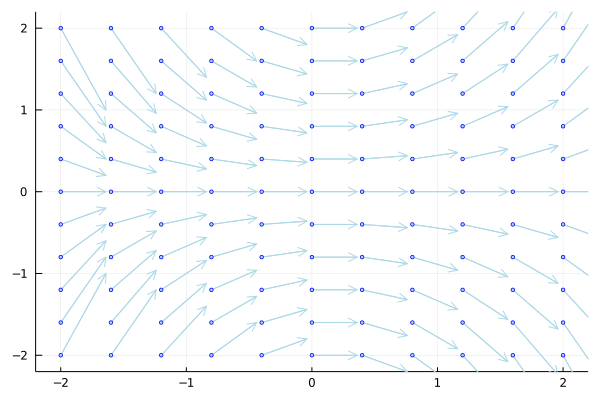

In [47]:
# Exemplo de teste da função definida
campo_ode(-2, 2, -2, 2, (t,y) -> t * y)

In [48]:
# Implementação do Método de Euler
function met_euler(t0, tf, y0, f; N = 100)
    # Vetor que armazena todos os valores de tempo (t0 até tn)
    # Esse vetor é criado para facilitar o desenho (plot) mais tarde
    t = range(t0, tf, length=N+1)
    
    # O 'passo' da nossa aproximação
    h = t[2] - t[1]
    
    # Vetor que armazena todos os valores de w
    # Iniciamos com todos os valores em 0
    w = zeros(N+1) 
    
    # O primeiro valor de w é o valor inicial passado
    w[1] = y0
    
    # Calculamos todos os pontos do vetor w
    for k = 1:N
        w[k+1] = w[k] + h * f(t[k], w[k])
    end
    
    # Retornamos w e t para plot
    return t, w
end

met_euler (generic function with 1 method)

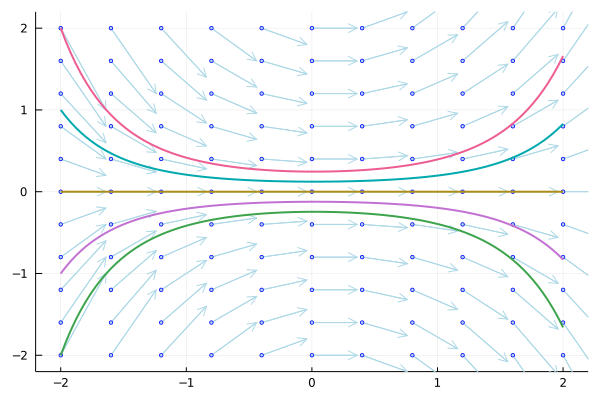

In [53]:
# Definimos t0 e tf e a função y
t0, tf = -2.0, 2.0
f(t,y) = t * y

# Carregamos o gráfico (plot) em p
p = campo_ode(t0, tf, -2, 2, f)

# Para os valores iniciais em [-2, 2], calculamos a aproximação de Euler
# As curvas definidas pelos pontos resultantes são adicionadas ao gráfico em p
for y0 in [-2, -1, 0, 1, 2]
    t, y = met_euler(t0, tf, y0, f)
    plot!(p, t, y, lw=2)
end

# Renderiza p
p

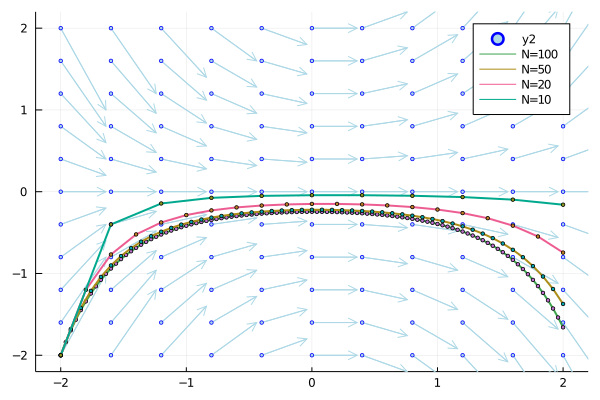

In [54]:
# Definimos t0 e tf e a função y
t0, tf = -2.0, 2.0
f(t,y) = t * y

# Carregamos o gráfico (plot) em p
p = campo_ode(t0, tf, -2, 2, f)

# Dessa vez, fixamos o valor inicial
y0 = -2

# Calculamos a aproximação de Euler com o N (número de passos) diminuindo
# As curvas definidas pelos pontos resultantes são adicionadas ao gráfico em p
# E os pontos são marcados nas curvas
for N = [100, 50, 20, 10]
    t, y = met_euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
    scatter!(p, t, y, lw=2, ms=2, lab="")
end

# Renderiza p
p

Vemos aqui que, quanto maior o número de pontos, melhor a aproximação obtida através do Método de Euler.

Para verificar isso, vejamos a aproximação usando o método para a equação exponencial.

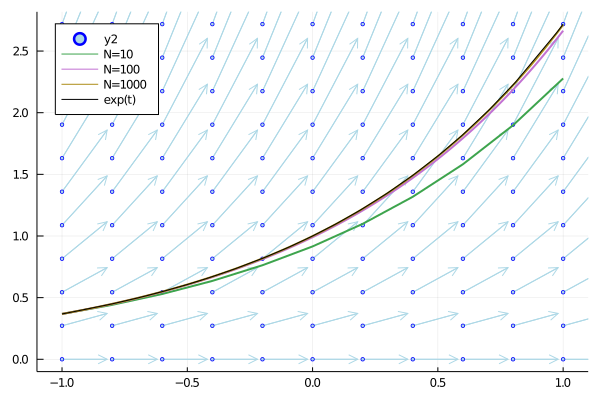

In [55]:
# Definimos uma função ysol(t) que recebe o valor da função exponencial em t
# Essa função será usada para plotar o gráfico da função exponencial 
# Assim, poderemos compará-lo com o gráfico da aproximação
ysol(t) = exp(t)

#Definimos t0 e tf e a função y
t0, tf = -1.0, 1.0
f(t,y) = y

# Carregamos o gráfico (plot) em p
p = campo_ode(t0, tf, 0, ysol(tf), f)

# Valor inicial será o valor da exponencial em t0
y0 = ysol(t0)

# Calculamos a aproximação de Euler com o N (número de passos) aumentando
# As curvas definidas pelos pontos resultantes são adicionadas ao gráfico em p
for N = [10, 100, 1000]
    t, y = met_euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
end

# Adicionamos o gráfico da função exponencial, para compararmos com a aproximação
plot!(p, ysol, t0, tf, c=:black, lab="exp(t)", legend=:topleft)

# Renderiza p
p

### Exercício

Seja a função $y(t) = e^t$. Sendo $y'(t) = y$, podemos definir um PVI dado por:

$$ {\begin{cases}y'(t)=y\\y(0)=1\end{cases}} $$

Quando $t = 1$, temos que $y(t) = e$. Assim, podemos calcular aproximar o valor de $e$ usando o Método de Euler com $h = 0.5$, da seguinte forma:

$$ y(0) = 1 $$

$$ y(0.5) \approx y(0) + h y(0) = 1 + 0.5 = 1.5 $$

$$ y(1) \approx 1.5 + h 1.5 = 1.5 + 0.75 = 2.25 $$

Sabendo que $e \approx 2.7182818284590452353602874$, temos que, usando $h = 0.5$, encontramos uma aproximação ruim para $e$.

A partir disso, podemos verificar o seguinte.

$$ w_N = (1+h)^N w_0 $$


Sendo assim, mostrar que

$$ \lim_{h \to 0} w_N = e$$

In [96]:
# Implementação do Método de Euler para aproximar e
function euler_e(h)
    # Valor inicial da função
    y0 = 1
    
    # Número de passos que serão dados
    # Queremos que t seja incrementado de h até que seja igual a y(0)
    n = y0 / h
    
    # O primeiro valor de w
    w0 = 1
    
    # Calculamos w
    w = (1+h)^n * w0
    
    # Retornamos w para plot
    return w
end

euler_e (generic function with 1 method)

In [120]:
euler_e(1), euler_e(0.5)

(2.0, 2.25)

In [123]:
euler_e(1e-1), euler_e(1e-2), euler_e(1e-3), euler_e(1e-5), euler_e(1e-10)

(2.5937424601000023, 2.7048138294215285, 2.7169239322355936, 2.718268237192297, 2.7182820532347876)

Vemos que com $h = 10^{-1}$, temos uma aproximação para $e$ bastante errada, com nenhum dígito depois da vírgula correto. Já para $h = 10^{-2}$, temos um dígito de precisão depois da vírgula. Para $h = 10^{-3}$, já temos dois dígitos de precisão. Quando passamos para $h = 10^{-5}$, pulamos para os quatro dígitos de precisão. Em $h = 10^{-10}$, temos 5 dígitos de precisão.

Assim, podemos perceber que, conforme diminuímos $h$, a aproximação fica cada vez melhor, o que mostra que $\lim_{h \to 0} w_N = e$. 